<a href="https://colab.research.google.com/github/capmar00/tmp/blob/main/Copy_of_04_Notebook_Data_Explo_Hands_on_SALVA_COPIA_IN_LOCALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [HANDS-ON]: BigMart Sales Data
- [Caricamento dei dati](#download)
- [Checkpoint 1 [Esplorazione dati]](#eda)
- [Checkpoint 2 [Preparazione dati]](#cleaning)

![bigmart](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)


Descrizione ufficiale del dataset

>I data scientist di BigMart hanno raccolto i dati sulle vendite del 2013 per 1559 prodotti in 10 negozi in diverse città. Inoltre, sono stati definiti alcuni attributi di ciascun prodotto e negozio. L'obiettivo finale è costruire un modello predittivo e scoprire le vendite di ciascun prodotto in un determinato negozio. Utilizzando questo modello, BigMart cercherà di comprendere le proprietà di prodotti e negozi che svolgono un ruolo chiave nell'aumento delle vendite. **Ma prima è necessario controllare se i dati sono pronti per essere utilizzati dal modello...!**



Ecco l'elenco delle variabili che prenderemo in considerazione:

- `Item_Identifier`	Unique product ID
- `Item_Weight`	Weight of product
- `Item_Fat_Content`	Checks the Concentration of fat in the product
- `Item_Visibility`	The % of total display area of all similar products in a store
- `Item_Type`	Product Category
- `Item_MRP`	Maximum Retail Price for a Product
- `Outlet_Identifier`	Unique Store ID
- `Outlet_Establishment_Year`	The year in which store was established
- `Outlet_Size`	The size of the store (Area Size Category)
- `Outlet_Location_Type`	In Terms of city Tiers (Size)
- `Outlet_Type`	Grocery store or a type of supermarket
- `Item_Outlet_Sales`	Sales of the product In the Specific outlet

Credits to: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

<a name="download"></a>
## 1. Caricamento dei dati

In [ ]:
!wget https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv

--2024-09-10 07:33:58--  https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861013 (841K) [text/plain]
Saving to: ‘Train.csv’

Train.csv           100%[===================>] 840.83K  --.-KB/s    in 0.05s   

2024-09-10 07:33:59 (15.5 MB/s) - ‘Train.csv’ saved [861013/861013]



##### Carichiamo le librerie che andremo ad utilizzare in questo tutorial

In [ ]:
import pandas as pd # la libreria principe per la gestione dei dati in Python
import seaborn as sns # libreria per le visualizzazioni
import plotly.express as px # libreria per visualizzazioni interattive
import matplotlib.pyplot as plt # altra libreria per le visualizzazioni

from pprint import pprint # comando per "abbellire" i messaggi a terminale

##### Carichiamo in memoria il file `Train.csv`

In [ ]:
df = pd.read_csv('Train.csv')

##### [Esercizio] Di quante righe e colonne è composto il datataset df?

In [ ]:
# inserisci il tuo codice qui


> Risposta attesa:

`8523 righe, 12 colonne`

###### Risposta corretta:

In [ ]:
df.shape

(8523, 12)

<a name="eda"></a>
## 2. EDA (Exploratory Data Analysis)

Iniziamo ad esplore il dataset!

##### Per prima cosa visualizziamo le prime 5 righe del dataset

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### [Esercizio] Quante variabili categoriche (`object`) e quante variabili numeriche (`float64`, `int64`) ci sono?

In [ ]:
# inserisci il tuo codice qui


> Risposta attesa:

`7 colonne categoriche, 5 colonne numeriche (4 di valori decimali [float], 1 di valori interi [int]`

###### Risposta corretta:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### [Esercizio] Quanti valori mancanti ci sono per ogni colonna?

In [ ]:
# inserisci il tuo codice qui


> Risposta attesa:

`1463 valori mancanti nella colonna Item Weight, 2410 valori mancanti nella colonna Outlet_Size`

###### Risposta corretta:

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


##### Creiamo un nuovo dataframe "cat", tenendo tutte le righe dell'originale e solo le colonne categoriche.

In [ ]:
cat = df.select_dtypes('object')

##### [Esercizio] Quanti valori univoci hanno le varie colonne categoriche?

In [ ]:
# inserisci il tuo codice qui


> Risposta attesa:

```
Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
```

###### Risposta corretta:

In [ ]:
cat.nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


##### [Esercizio] Quali sono i valori unici in ciascuna colonna categorica e qual è la frequenza di ciascuno? Notate qualcosa di particolare (specialmente nelle colonne `Item_Identifier` e `Item_Fat_Content`)?

In [ ]:
# inserisci il tuo codice qui


> Risposta attesa:

```
Colonna: Item_Identifier

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

****************
Colonna: Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

****************
Colonna: Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

****************
Colonna: Outlet_Identifier

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

****************
Colonna: Outlet_Size

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

****************
Colonna: Outlet_Location_Type

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

****************
Colonna: Outlet_Type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

****************
```
Osservazioni:

- La colonna `Item_Identifier` sembra composta da 2 caratteri che identificano la tipologia di prodotto seguiti da due cifre identificative del singolo prodotto.

- Nella colonna `Item_Fat_Content` abbiamo dei valori che rappresentano la stessa cosa, ma scritti in maniera diversa: `LF` e `low_fat` ad esempio

###### Risposta corretta:

In [ ]:
for col in df.select_dtypes('object'):
    print(f'Colonna: {col}')
    print(df[col].value_counts())
    print('\n****************\n')

Colonna: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

****************

Colonna: Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

****************

Colonna: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

****************

Colonna: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046 

##### [Esercizio] Analizziamo anche le variabili numeriche:

Otteniamo per prima cosa le statistiche di base (min, max, media, ...).

Notate qualcosa di strano (specialmente nella colonna `Item_Visibility`?)

In [ ]:
# inserisci qui il tuo codice


> Risposta attesa:

```
         Item_Weight	Item_Visibility	 Item_MRP       Outlet_Establishment_Year	 Item_Outlet_Sales
count	7060.000000	8523.000000	     8523.000000	8523.000000	 	 	 	8523.000000
mean	 12.857645	  0.066132	        140.992782	 1997.831867	 	 	 	2181.288914
std	  4.643456	   0.051598	        62.275067	  8.371760	 	 			1706.499616
min	  4.555000	   0.000000	        31.290000	  1985.000000	 	 	 	33.290000
25%	  8.773750	   0.026989	        93.826500	  1987.000000	 	 	 	834.247400
50%	  12.600000	   0.053931	       143.012800     1999.000000	 	 	 	1794.331000
75%	  16.850000	   0.094585	       185.643700	 2004.000000	 	 	 	3101.296400
max	  21.350000	   0.328391	       266.888400	 2009.000000	 	 	 	13086.964800
```

Il minimo valore di `Item_Visibiltity` è 0, ma a rigor di logica questo valore dovrebbe essere sempre strettamente maggiore di 0, altrimenti l'item sarebbe invisibile!

###### Risposta corretta:

In [ ]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.069460,140.992782,1997.831867,2181.288914
std,4.645008,0.048893,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 3. Feature Engineering

### 3.1 Creiamo una nuova colonna `Item_Category`

##### [Esercizio] Creiamo una nuova colonna `Item_Category` contenente i primi 2 caratteri della colonna `Item_Identifier`

In [ ]:
# inserisci qui il tuo codice


###### Risposta corretta:

`df['Item_Category'] = df['Item_Identifier'].str[:2]`

##### [Esercizio] Contiamo i valori unici in questa nuova colonna. Riuscite a indovinare a cosa corrispondono queste sigle?

In [ ]:
# inserisci qui il tuo codice


> Risposta attesa:
```
FD    6125
NC    1599
DR     799
```

- FD = food
- NC = non-consumable
- DR = drink

###### Risposta corretta:

In [ ]:
df['Item_Category'].value_counts()

,count
Item_Category,
FD,6125
NC,1599
DR,799


##### Visualizziamo alcune righe, focalizzandoci sulle sole colonne `Item_Identifier`, `Item_Category`, `Item_Type` per vedere se ci torna tutto

In [ ]:
df[['Item_Identifier', 'Item_Category', 'Item_Type']].head(20)

,Item_Identifier,Item_Category,Item_Type
0,FDA15,FD,Dairy
1,DRC01,DR,Soft Drinks
2,FDN15,FD,Meat
3,FDX07,FD,Fruits and Vegetables
4,NCD19,NC,Household
5,FDP36,FD,Baking Goods
6,FDO10,FD,Snack Foods
7,FDP10,FD,Snack Foods
8,FDH17,FD,Frozen Foods
9,FDU28,FD,Frozen Foods


... ma forse un grafico è ancora più comodo ...

In [ ]:
# usiamo plotly che ci permette poi di capire meglio il grafico rendendolo interattivo
px.histogram(df, x="Item_Category", color="Item_Type")

### 3.2 Andiamo ora a "pulire" la colonna `Item_Fat_Content`

##### [Esercizio] Per prima cosa visualizziamo di nuovo il conteggio dei valori unici in questa colonna per rinfrescarci la memoria

In [ ]:
# inserisci qui il tuo codice


###### Risposta corretta:

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


##### [Esercizio] Convertiamo "LF", "low fat" in "Low Fat" e "reg" in "Regular"

In [ ]:
# inserisci qui il tuo codice


###### Risposta corretta:

`df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})`

##### [Esercizio] Contiamo nuovamente i valori unici per accertarci di aver eseguito la trasformazione correttamente

In [ ]:
# inserisci qui il tuo codice


> Risposta attesa:

```
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
```

###### Risposta corretta:

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


### 3.3 Gestione Missing Values (Colonna `Item_Weight`)



##### ❗❗❗ Sezione difficile (si può saltare e passare oltre)❗❗❗

I valori mancanti sono *missing at random* o si concentrano in una determinata categoria?

Magari il valore di peso è mancante solamente in un outlet, ma in un altro è valorizzato... E possiamo ragionevolmente assumere che il peso di un prodotto non cambi da un negozio all'altro! (compito a casa: verificare questa assunzione).

Creiamo un dizionario dove associamo a ciascun prodotto il suo peso.

In [ ]:
mappa_prodotto_peso = (
    df
    .dropna(subset=['Item_Weight']) # scartiamo temporaneamente le righe con peso mancante
    .groupby('Item_Identifier') # raggruppiamo per Item_Identifier
    .agg({'Item_Weight': 'first'}) # prendiamo il primo valore di Item Weight
    .to_dict()['Item_Weight'] # trasformiamo in dizionario
)

mappa_prodotto_peso

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.27,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37': 16.2,
 'DRG39': 14.15,
 '

In [ ]:
missing_mask = df.Item_Weight.isna() # questa "maschera" ci indica le righe in cui il peso è mancante
missing_mask.head(20)

,Item_Weight
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


In [ ]:
# laddove il peso è mancante, andiamo a recuperare il peso di quel prodotto dalla mappa, se presente
df.loc[missing_mask, 'Item_Weight'] = df.loc[missing_mask, 'Item_Identifier'].map(mappa_prodotto_peso)

# vediamo se il numero di valori mancanti si è abbassato...
df.Item_Weight.isna().sum() # solo 4 prodotti ora risultano mancanti! Prima erano circa 1400!

4

🟢🟢🟢 FINE sezione difficile 🟢🟢🟢

##### Vediamo quali prodotti risultano ancora con peso mancante

In [ ]:
df[df.Item_Weight.isna()] # Sono 4 prodotti di categoria Food.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,FD
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,FD
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,FD
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,FD


##### Controlliamo se ci sono differenze di peso tra le 3 categorie così decidiamo la strategia per imputare i valori mancanti.



In [ ]:
# Controlliamo la media per gruppi
df.groupby('Item_Category')['Item_Weight'].mean()

,Item_Weight
Item_Category,
DR,12.112040
FD,12.833017
NC,13.419190


<Axes: xlabel='Item_Category', ylabel='Item_Weight'>

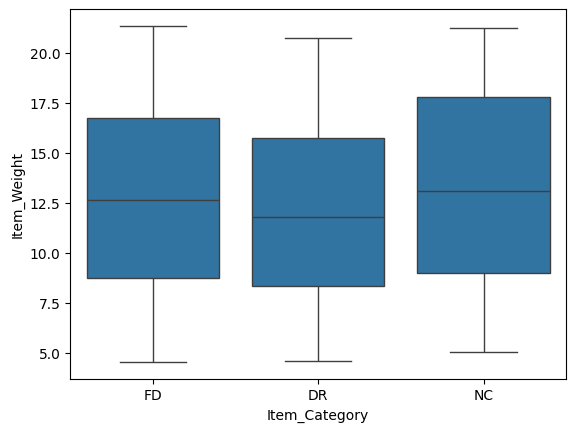

In [ ]:
# Facciamoci aiutare anche da un boxplot
sns.boxplot(data=df, x='Item_Category', y='Item_Weight')

Non emergono differenze significative... possiamo utilizzare la media globale come valore per imputare i (restanti) pesi mancanti.

##### [Esercizio] Sostituisci i valori mancanti di `Item_weight` con la media.

In [ ]:
# inserisci il tuo codice qui


###### Risposta corretta:

`df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())`

##### Controlliamo infine che non ci siano più valori mancanti in questa colonna

In [ ]:
df[df.Item_Weight.isna()] # ok!

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category


### 3.4 Gestione Missing Values (Colonna `Outlet_Size`)

##### Controlliamo per prima cosa se i valori mancanti sono casuali o appartengono ad una categoria particolare, ad es. allo stesso `Outlet_Type`

In [ ]:
df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.isna().sum())

,Outlet_Size
Outlet_Type,
Grocery Store,555
Supermarket Type1,1855
Supermarket Type2,0
Supermarket Type3,0


##### I valori mancanti sono soltanto nelle categorie `Grocery Store` e `Supermarket Type 1`. Andiamo a vedere quale è la `Outlet_Size` di questa tipologia di negozi

In [ ]:
(
    df
    .loc[df.Outlet_Type.isin(['Grocery Store', 'Supermarket Type1'])] # filtriamo temporaneamente solo gli outlet di questi due tipi
    .groupby(['Outlet_Type','Outlet_Size']) # raggruppiamo per Outlet_Type e Outlet_Size
    .size() # Contiamo le occorrenze per ciascuna categoria
)

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
dtype: int64

##### [Esercizio] Sostituisci i valori mancanti nella colonna `Outlet_Size` con `Small`.

Tutti i Grocery_Store e circa la metà dei Supermarket Type 1 sono di size Small, quindi possiamo ragionevolmente sostituire i valori mancanti con Small.

In [ ]:
# inserisci qui il tuo codice


**Attenzione**: sostituire i valori mancanti con la *moda* (il valore più frequente) è una **scelta**. In questo caso specifico la scelta è ragionevole da una parte e innocua dall'altra, però non tutte le scelte e non tutti i dati sono equivalenti!

Rimanendo nella casistica negozi, possiamo immaginare che un dato tracciabile sia la presenza di [barriere architettoniche](https://it.wikipedia.org/wiki/Barriera_architettonica) nel locale: ipotizzare che un negozio per cui questo dato è mancante non abbia barriere architettoniche solo perché la maggior parte dei negozi non ne ha, potrebbe avere conseguenze concrete per delle persone.

Nel lavoro di *data scientist* incontrerai diverse situazioni in cui è importante chiederti se la scelta che stai facendo è innocua oppure no!

###### Risposta corretta:

`df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')`

##### Controlliamo infine che non ci siano più valori mancanti in questa colonna

In [ ]:
df[df.Outlet_Size.isna()] # ok!

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category


### 3.5 Gestione Missing Values (Colonna  `Item_Visibility`)

Nella colonna `Item_Visibility` ci sono alcuni valori non validi (ossia pari a 0). In questo caso consideriamo come valori mancanti gli zeri*.

Cerchiamo di capire se i valori mancanti sono *missing at random* oppure riguardano una categoria specifica di outlet o di items.

Proviamo a vedere ad esempio se i valori mancanti si concentrano in un determinato outlet.


*nota: il fatto che "0" corrisponda a un valore mancante è una informazione che si deduce da una documentazione appropriata dei dati. Se non avessimo questa informazione non potremmo sapere che "0" corrisponde a un dato mancante e non potremmo fare imputazione di questi dati. Di conseguenza, quei valori pari a "0" andrebbero a impattare le statistiche e gli eventuali modelli costruiti sopra a questo dato!

In [ ]:
(
    df
    .groupby('Outlet_Identifier')['Item_Visibility']
    .agg(lambda x: (x==0).sum())
)

,Item_Visibility
Outlet_Identifier,
OUT010,29
OUT013,59
OUT017,57
OUT018,65
OUT019,30
OUT027,60
OUT035,54
OUT045,58
OUT046,61


La mancanza dell'informazione sull'`Item_Visibility` non sembra dipendere dall'outlet... Proviamo a vedere se dipende dalla categoria di prodotto

In [ ]:
(
    df
    .groupby('Item_Type')['Item_Visibility']
    .agg(lambda x: (x==0).sum())
)

,Item_Visibility
Item_Type,
Baking Goods,45
Breads,17
Breakfast,3
Canned,33
Dairy,38
Frozen Foods,51
Fruits and Vegetables,87
Hard Drinks,17
Health and Hygiene,33


Non sembra nemmeno dipendere dal tipo di prodotto... si fa strada l'idea che siano effettivamente *missing at random*. Vediamo come si distribuiscono i valori per decidere se utilizzare la **media** o la **mediana**...

##### [Esercizio] Utilizzeresti media o mediana come valore sostitutivo a quelli mancanti? Per rispondere a questa domanda puoi aiutarti con dei grafici (boxplot o istogramma ad esempio).

In [ ]:
# inserisci qui il tuo codice (boxplot)


In [ ]:
# inserisci qui il tuo codice (istogramma)


> Risposta attesa:
è più indicata la mediana, perchè la distribuzione dei valori non è ben "centrata", ci sono tanti outliers e la media ne risente più che la mediana.

###### Risposta corretta:

<Axes: xlabel='Item_Visibility'>

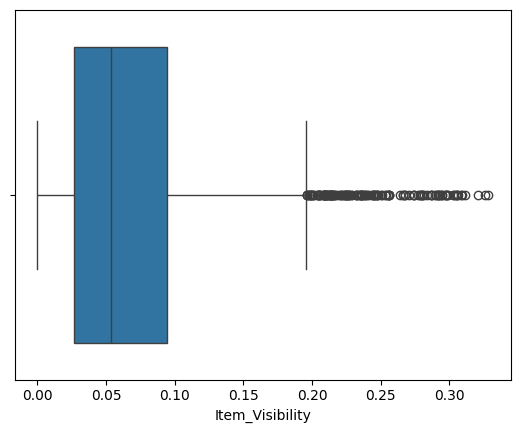

In [ ]:
# boxplot
sns.boxplot(data=df, x='Item_Visibility') # la distribuzione non sembra ben "centrata", ci sono molti outliers nella parte destra. La mediana risulta dunque più indicata

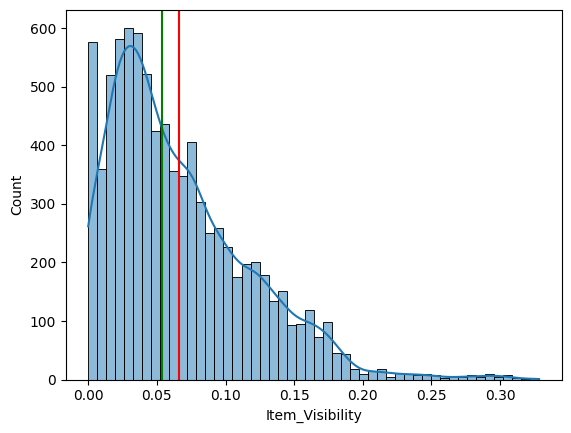

In [ ]:
# Istogramma
fig, ax = plt.subplots()
sns.histplot(data=df, x='Item_Visibility', kde=True, ax=ax) # la distribuzione non sembra ben "centrata", ha una lunga coda a destra
ax.axvline(x=df.Item_Visibility.mean(), color='red')
ax.axvline(x=df.Item_Visibility.median(), color='green') # la mediana è più vicina alla regione "densa" di questa distribuzione

##### [Esercizio] Sostituisci gli zeri nella colonna `Item_Visibility` con l'indicatore statisco da te scelto

In [ ]:
# inserisci qui il tuo codice (attenzione che non si può utilizzare il metodo fillna perchè i valori da sostituire sono gli zeri: cerca piuttosto come utilizzare il metodo replace)


Controlliamo che non ci siano più valori pari a 0 nella colonna `Item_Visibility`

In [ ]:
df.loc[df.Item_Visibility == 0] # ok!

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category


###### Risposta corretta:

`df.replace({'Item_Visibility': {0: df.Item_Visibility.median()}}, inplace=True)`

## 4. Data Visualization

Ora che abbiamo i dati puliti e in ordine possiamo concentrarci sul nostro obiettivo finale, ossia predirre il numero di prodotti venduti.

Aiutiamoci con qualche grafico per avere una prima idea "ad occhio" di quali variabili saranno più importanti per il modello.


##### [Esercizio] 4.1  ci sono tipologie di prodotto (`Item_Type`) che vendono più di altre?

In [ ]:
# inserisci il tuo codice qui (suggerimento prova con un boxplot o un barplot)


> Risposta attesa:
Non sembrano esserci grandissime differenze nel numero di unità vendute in base alla sola tipologia di prodotto.


###### Risposta corretta:

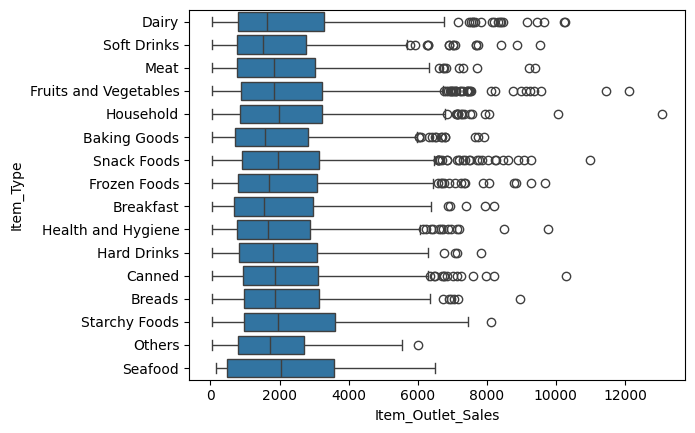

In [ ]:
sns.boxplot(y='Item_Type', x='Item_Outlet_Sales', data=df);

##### [Esercizio] 4.2 ci sono `Outlet_Type` dove si vende più che in altri?

In [ ]:
# inserisci il tuo codice qui (suggerimento prova con un boxplot o un barplot o una pie chart)


> Risposta attesa:
I supermarket, specialmente quelli di tipo 3, vendono più dei Grocery Store.

###### Risposta corretta:

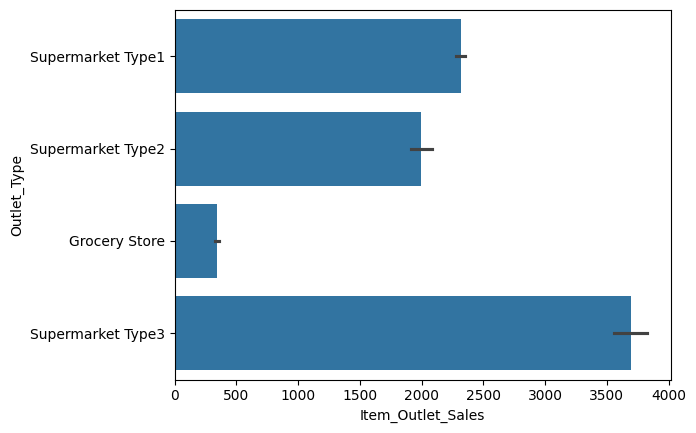

In [ ]:
sns.barplot(y='Outlet_Type', x='Item_Outlet_Sales', data=df);

##### [Esercizio] 4.3 La `Item_Visibility` ha impatto sul numero di unità vendute?

In [ ]:
# inserisci il tuo codice qui (suggerimento prova con uno scatterplot)


> Risposta attesa:
Paradossalmente i prodotti chon più alta visibilità hanno un volume di venduto più basso di quella a bassa visibilità...

###### Risposta corretta:

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

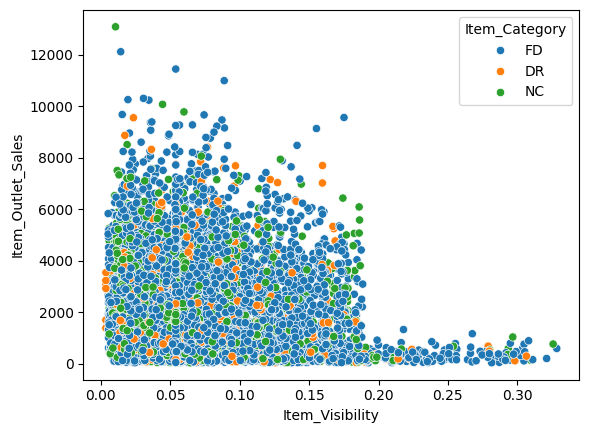

In [ ]:
sns.scatterplot(y='Item_Outlet_Sales', x='Item_Visibility', data=df, hue='Item_Category')

##### **Complimenti hai completato il tutorial! Ora puoi sbizzarrirti liberamente! Crea nuovi grafici, approfondisci l'analisi dati, lancia un modello di Machine Learning, ...!**


In [ ]:
# inserisci il tuo codice qui